> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction - TBD

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

#### Data Set
I like movies and usually surf IMDB for movies rating and information so I will choose the TMDB movie data.

#### Questions I try to investigate
- Q1: What is the correlation between: budget, revenue, voting and popularity?
- Q2: Evolution of run time and voting over the years?
- Q3: Who is the most profitable actor/actress for the movies they casted?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('tmdb-movies.csv')
print(data.shape)
print(list(data.columns.values))
data.info()

(10866, 21)
['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres       

In [3]:
# print out 5 1st rows of the data
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# print out the overview of the data
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# check for duplicates
sum(data.duplicated())

1

In [6]:
# identify amount of null-values in each column
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# drop the duplicate
data.drop_duplicates(inplace=True)

In [8]:
# dropping irrelevant columns 
data.drop(['id', 'imdb_id', 'budget', 'revenue', 'director', 'genres', 'production_companies', 'homepage', 'tagline', 'keywords', 'overview', 'release_date'], axis=1, inplace=True)

In [9]:
# removing columns with null
data.dropna(inplace=True)
data.isnull().sum()
# check cleaned dataset
print(data.shape)
print(list(data.columns.values))

(10789, 9)
['popularity', 'original_title', 'cast', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What is the correlation between: budget, revenue, voting and popularity?

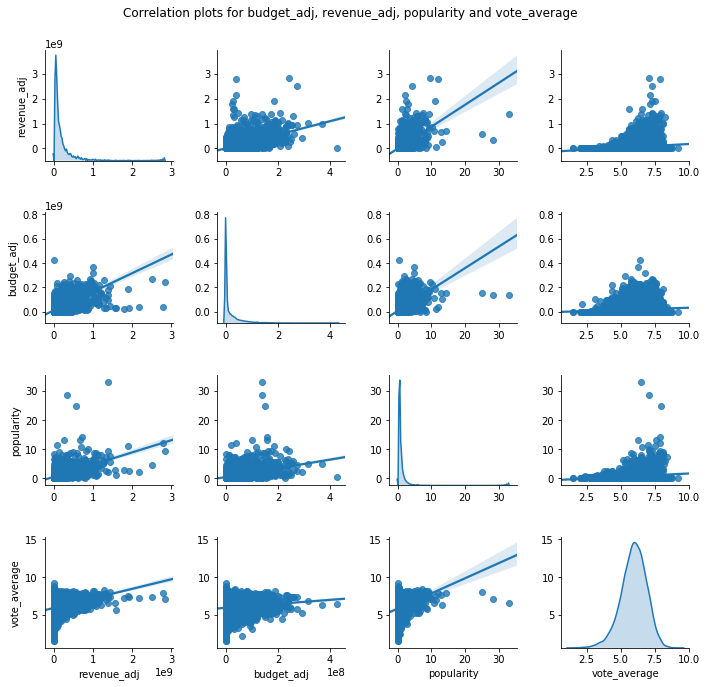

In [10]:
# Correclation plot for budget_adj, revenue_adj, popularity and vote_average
q1_df = data[['revenue_adj', 'budget_adj', 'popularity', 'vote_average']]
f1 = sns.pairplot(q1_df, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
f1.fig.suptitle('Correlation plots for budget_adj, revenue_adj, popularity and vote_average\n')
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

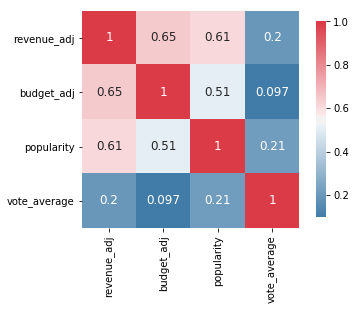

In [11]:
# Correlation heatmap
corr = q1_df.corr()
f2 , ax = plt.subplots( )
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
f2 = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' :12})

#### Answer for question 1:
There is strong correlation between budget_adj, revenue_adj and popularity. The correlation between vote_average and other 3 aspects is quite weak. 

### Research Question 2: Evolution of run time and voting over the years? 

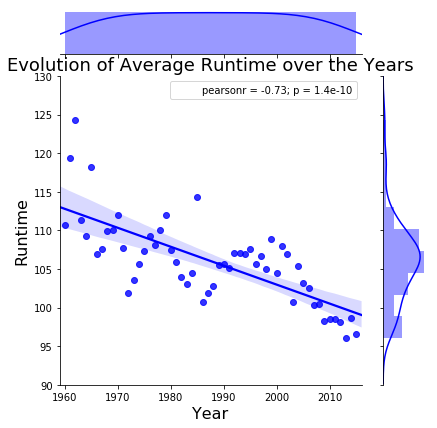

In [12]:
# Create a subset with averages grouped by year
q2_df = data.groupby('release_year', as_index=False)['runtime','vote_average'].mean()
# Linear regression on average movie runtimes over the years
f3 = sns.jointplot(x="release_year", y="runtime", data=q2_df, space=0.5, kind="reg", ylim=(90, 130), xlim=(1959, 2016), color="b")
plt.title('Evolution of Average Runtime over the Years', fontdict={'fontsize': 18})
plt.xlabel('Year', fontdict={'fontsize': 16})
plt.ylabel('Runtime', fontdict={'fontsize': 16});

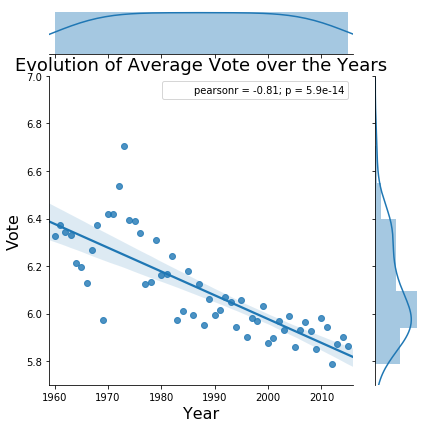

In [13]:
f4 = sns.jointplot(x="release_year", y="vote_average", data=q2_df, space=0.5, kind="reg", ylim=(5.7, 7), xlim=(1959, 2016))
plt.title('Evolution of Average Vote over the Years', fontdict={'fontsize': 18})
plt.xlabel('Year', fontdict={'fontsize': 16})
plt.ylabel('Vote', fontdict={'fontsize': 16});

#### Answer for Question 2:
Average runtime and vote_average is decrease by years from 1960 to 2015.

### Research Question 3: Who is the most profitable actor/actress for the movies they casted?
- Here we sorted the actor by profit per movies they casted. And we only chose the actor/actress with more than 20 movies.

In [14]:
# Split the dataframe by actor
actor = data['cast'].str.split('|').apply(pd.Series).stack()
actor.index = actor.index.droplevel(-1)
actor.name = 'actor'
q3_df = data.copy()
q3_df = q3_df.join(actor)
q3_df['count'] = q3_df.groupby('actor')['actor'].transform('count')
q3_df.head()

,popularity,original_title,cast,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,actor,count
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,10
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard,7
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan,6
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio,24
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson,5


Text(0.5,1,'Top 20 actors/actresses and number of films')

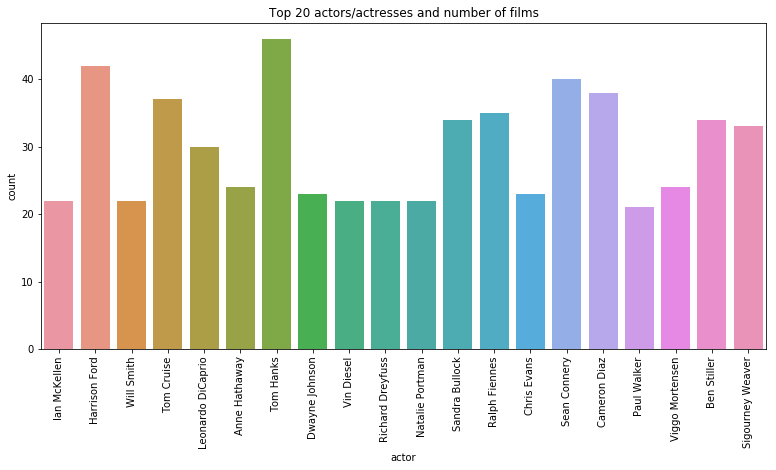

In [15]:
# Clean the zeros budgets and revenue 
q3_df['budget_adj'] = q3_df['budget_adj'].replace(0, np.nan)
q3_df['revenue_adj'] = q3_df['revenue_adj'].replace(0, np.nan)
q3_df.dropna(inplace=True)
# Calculate the profit
q3_df['profit'] = (q3_df['revenue_adj']-q3_df['budget_adj'])/q3_df['count']
# Only take the actor join more than 20 films
q3_df = q3_df[q3_df['count'] > 20]
# Create data of 20 actor have the best return for films they casted
actor_top20 = q3_df.groupby(['count','actor'])['profit'].sum()
df_actor_top20 = actor_top20.to_frame('profit').reset_index().sort_values(['profit'], ascending=[False])
df_actor_top20.iloc[:20]
plt.figure(figsize=(13,6))
f5 = sns.barplot(x='actor', y='count', data=df_actor_top20.iloc[:20])
plt.xticks(rotation=90)
f5.set_title('Top 20 actors/actresses and number of films')

Text(0.5,1,'Top 20 actors/actresses and Profit per movie they casted')

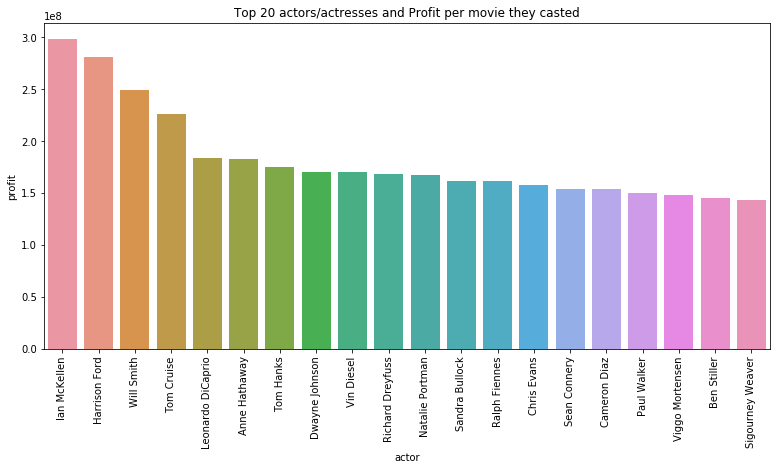

In [16]:
plt.figure(figsize=(13,6))
f6 = sns.barplot(x='actor', y='profit', data=df_actor_top20.iloc[:20])
plt.xticks(rotation=90)
f6.set_title('Top 20 actors/actresses and Profit per movie they casted')

#### Answer for Question 3: See the list of actors above

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0